In [6]:
%cd /content/drive/MyDrive/금융데이터 공모전(joined)

/content/drive/MyDrive/금융데이터 공모전(joined)


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

### 설치 후 런타임 재시작

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [7]:
df = pd.read_csv("data/nfinsumjoin2.csv", encoding = 'euc-kr')

In [8]:
df = df.drop(columns= 'Unnamed: 0')

In [9]:
df.head()

,기준년월,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n
0,201903,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,...,0,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0,345
1,201903,가락동,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,...,0,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0,411
2,201903,가락동,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,...,0,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0,369
3,201903,가락동,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,...,0,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0,363
4,201903,가락동,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0,582


In [10]:
#데이터 무결성 검사
df[df.duplicated(['기준년월','법정동','성별','연령'])]

,기준년월,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n


In [11]:
df[df.duplicated(df.columns[104:116])]#금융데이터끼리 중복 없음

,기준년월,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n


In [12]:
df[df.duplicated(df.columns[4:104])] #소비데이터또한 중복 없음

,기준년월,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n


In [13]:
df.shape

(14472, 117)

In [14]:
df.columns

Index(['기준년월', '법정동', '성별', '연령', 'DIY자재/용품_매출건수', 'DIY자재/용품_매출금액',
       ' e머니/상품권_매출건수', ' e머니/상품권_매출금액', 'o2o서비스_매출건수', 'o2o서비스_매출금액',
       ...
       '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액',
       '주택대출금액', '전세자금대출금액', 'n'],
      dtype='object', length=117)

## 데이터 정제 계획

1. 날짜는 날짜형으로 바꿔줘야 함(컴퓨터가 인식하는 급간이 숫자형과는 차이가 있음)(혹은 그냥 1234로)

2. 기준년월, 성별, 연령, 법정동을 제외한 나머지 열들을 n으로 나눠줘야 함(1인당 구매 혹은 1인당 금융자산을 구하기 위해서) 이때, 소비 데이터와 은행 데이터의 급간을 조정하기 위해 n*alpha값으로 소비데이터를 나눠주기. -> 새로운 1인당 데이터에 대해 대처할 수 있음

***기준년월, 성별, 연령, 법정동을 기준으로 만들어진 데이터이므로 해석에 유의할 것***

In [15]:
def change_date(x):
  if x == 201903:
    return 1
  elif x == 201909:
    return 2
  elif x == 202003:
    return 3
  elif x == 202009:
    return 4
  elif x == 202103:
    return 5

df['기준년월'] = df['기준년월'].apply(change_date)

df['기준년월'][1:5]

1    1
2    1
3    1
4    1
Name: 기준년월, dtype: int64

In [16]:
df.to_csv('refined_data.csv')

## (전처리 2번 수행안함) 우선 머신러닝 수행해보자.

성별, 연령 예측

x : 성별, 연령을 제외한 모든 feature

y : 성별, 혹은 연령

### 1, 법정동 제외한상태로

(1) 성별예측

In [17]:
test1 = df.drop(columns=['법정동'])

col1 = test1.columns[1:].to_list()
col2 = test1.columns[:1].to_list()
new_col = col1+col2
test1 = test1[new_col]
test1.head()

,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,모바일상품_매출금액,...,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,기준년월
0,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,269317,...,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0,345,1
1,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,38,839637,...,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0,411,1
2,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,38,891749,...,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0,369,1
3,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,0,0,...,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0,363,1
4,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0,582,1


In [18]:
X = test1.iloc[:,1:]
y = test1.iloc[:,[0]]

print(X.shape)
print(y.shape)

(14472, 115)
(14472, 1)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [21]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)

In [22]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89      1386
           2       0.91      0.87      0.89      1509

    accuracy                           0.89      2895
   macro avg       0.89      0.89      0.89      2895
weighted avg       0.89      0.89      0.89      2895



(2) 연령 예측

In [23]:
test2 = df.drop(columns=['법정동'])

col1 = test2.columns[2:].to_list()
col2 = test2.columns[:2].to_list()
new_col = col1+col2
test2 = test2[new_col]
test2.head()

,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,모바일상품_매출금액,문화_매출건수,...,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,기준년월,성별
0,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,269317,13,...,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0,345,1,1
1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,38,839637,63,...,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0,411,1,1
2,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,38,891749,42,...,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0,369,1,1
3,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,0,0,0,...,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0,363,1,1
4,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0,582,1,1


In [24]:
X = test2.iloc[:,1:]
y = test2.iloc[:,[0]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          20       0.86      0.89      0.87       664
          30       0.76      0.77      0.76       718
          40       0.72      0.67      0.69       610
          50       0.82      0.85      0.83       539
          60       0.97      0.93      0.95       364

    accuracy                           0.81      2895
   macro avg       0.82      0.82      0.82      2895
weighted avg       0.81      0.81      0.81      2895



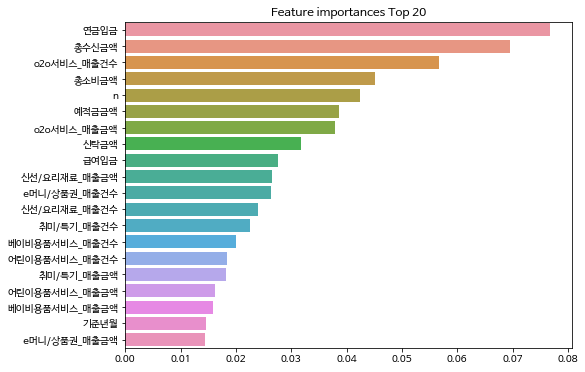

In [28]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

### 2, 법정동 포함(ohv수행)

(1)성별

In [ ]:
df.head()

,기준년월,법정동,성별,연령,DIY자재/용품_매출금액,DIY자재/용품_매출건수,e머니/상품권_매출금액,e머니/상품권_매출건수,o2o서비스_매출금액,o3o서비스_매출건수,가공식품_매출금액,가공식품_매출건수,가방_매출금액,가방_매출건수,가전_매출금액,가전_매출건수,건강식품_매출금액,건강식품_매출건수,기부/후원_매출금액,기부/후원_매출건수,기타_매출금액,기타_매출건수,기타결제_매출금액,기타결제_매출건수,기타교육비_매출금액,기타교육비_매출건수,남성뷰티_매출금액,남성뷰티_매출건수,남성속옷실내복_매출금액,남성속옷실내복_매출건수,남성의류_매출금액,남성의류_매출건수,다이어트_매출금액,다이어트_매출건수,디지털_매출금액,디지털_매출건수,레저_매출금액,레저_매출건수,메이크업_매출금액,메이크업_매출건수,...,여성속옷실내복_매출건수,여성의류_매출금액,여성의류_매출건수,여행_매출금액,여행_매출건수,육아용품서비스_매출금액,육아용품서비스_매출건수,음료_매출금액,음료_매출건수,인테리어소품_매출금액,인테리어소품_매출건수,임산부용품서비스_매출금액,임산부용품서비스_매출건수,자동차_매출금액,자동차_매출건수,취미/특기_매출금액,취미/특기_매출건수,침구/수예_매출금액,침구/수예_매출건수,침대_매출금액,침대_매출건수,테이블가구_매출금액,테이블가구_매출건수,패션소품_매출금액,패션소품_매출건수,향수_매출금액,향수_매출건수,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n
0,1,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,False,False,67,5798971,0,0,0,0,...,0,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0,345
1,1,가락동,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,False,False,179,16190891,17,430116,0,0,...,0,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0,411
2,1,가락동,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,False,False,158,6323198,21,1207176,0,0,...,0,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0,369
3,1,가락동,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,False,False,54,11018000,13,682882,0,0,...,0,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0,363
4,1,가락동,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,False,False,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0,582


In [ ]:
ohv = pd.get_dummies(data=df, columns=['법정동'], prefix=[''])
ohv

,기준년월,성별,연령,DIY자재/용품_매출금액,DIY자재/용품_매출건수,e머니/상품권_매출금액,e머니/상품권_매출건수,o2o서비스_매출금액,o3o서비스_매출건수,가공식품_매출금액,가공식품_매출건수,가방_매출금액,가방_매출건수,가전_매출금액,가전_매출건수,건강식품_매출금액,건강식품_매출건수,기부/후원_매출금액,기부/후원_매출건수,기타_매출금액,기타_매출건수,기타결제_매출금액,기타결제_매출건수,기타교육비_매출금액,기타교육비_매출건수,남성뷰티_매출금액,남성뷰티_매출건수,남성속옷실내복_매출금액,남성속옷실내복_매출건수,남성의류_매출금액,남성의류_매출건수,다이어트_매출금액,다이어트_매출건수,디지털_매출금액,디지털_매출건수,레저_매출금액,레저_매출건수,메이크업_매출금액,메이크업_매출건수,모바일상품_매출금액,...,_풍납동,_필동1가,_필동2가,_필동3가,_필운동,_하계동,_하왕십리동,_하월곡동,_하중동,_한강로1가,_한강로2가,_한강로3가,_한남동,_합동,_합정동,_항동,_행당동,_행촌동,_현석동,_현저동,_혜화동,_홍은동,_홍익동,_홍제동,_홍지동,_홍파동,_화곡동,_화동,_화양동,_황학동,_회기동,_회현동1가,_회현동2가,_효자동,_효제동,_효창동,_후암동,_휘경동,_흑석동,_흥인동
0,1,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,False,False,67,5798971,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,False,False,179,16190891,17,430116,0,0,38,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,False,False,158,6323198,21,1207176,0,0,38,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,False,False,54,11018000,13,682882,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,False,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,5,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14468,5,2,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,10,266084,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14469,5,2,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,21,1278523,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14470,5,2,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#마지막 하나 지워주기(ohe hot vector이기 때문)

ohv = ohv.iloc[:,:-1]

In [ ]:
col1 = ohv.columns[1:].to_list()
col2 = ohv.columns[:1].to_list()
new_col = col1+col2
test1 = ohv[new_col]
test1.head()

,성별,연령,DIY자재/용품_매출금액,DIY자재/용품_매출건수,e머니/상품권_매출금액,e머니/상품권_매출건수,o2o서비스_매출금액,o3o서비스_매출건수,가공식품_매출금액,가공식품_매출건수,가방_매출금액,가방_매출건수,가전_매출금액,가전_매출건수,건강식품_매출금액,건강식품_매출건수,기부/후원_매출금액,기부/후원_매출건수,기타_매출금액,기타_매출건수,기타결제_매출금액,기타결제_매출건수,기타교육비_매출금액,기타교육비_매출건수,남성뷰티_매출금액,남성뷰티_매출건수,남성속옷실내복_매출금액,남성속옷실내복_매출건수,남성의류_매출금액,남성의류_매출건수,다이어트_매출금액,다이어트_매출건수,디지털_매출금액,디지털_매출건수,레저_매출금액,레저_매출건수,메이크업_매출금액,메이크업_매출건수,모바일상품_매출금액,모바일상품_매출건수,...,_풍납동,_필동1가,_필동2가,_필동3가,_필운동,_하계동,_하왕십리동,_하월곡동,_하중동,_한강로1가,_한강로2가,_한강로3가,_한남동,_합동,_합정동,_항동,_행당동,_행촌동,_현석동,_현저동,_혜화동,_홍은동,_홍익동,_홍제동,_홍지동,_홍파동,_화곡동,_화동,_화양동,_황학동,_회기동,_회현동1가,_회현동2가,_효자동,_효제동,_효창동,_후암동,_휘경동,_흑석동,기준년월
0,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,False,False,67,5798971,0,0,0,0,13,269317,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,False,False,179,16190891,17,430116,0,0,38,839637,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,False,False,158,6323198,21,1207176,0,0,38,891749,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,False,False,54,11018000,13,682882,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,False,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = test1.iloc[:,1:]
y = test1.iloc[:,[0]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.92      0.89      1386
           2       0.92      0.87      0.90      1509

    accuracy                           0.89      2895
   macro avg       0.89      0.90      0.89      2895
weighted avg       0.90      0.89      0.89      2895



(2) 연령

In [ ]:
col1 = ohv.columns[2:].to_list()
col2 = ohv.columns[:2].to_list()
new_col = col1+col2
test2 = ohv[new_col]
test2.head()

,연령,DIY자재/용품_매출금액,DIY자재/용품_매출건수,e머니/상품권_매출금액,e머니/상품권_매출건수,o2o서비스_매출금액,o3o서비스_매출건수,가공식품_매출금액,가공식품_매출건수,가방_매출금액,가방_매출건수,가전_매출금액,가전_매출건수,건강식품_매출금액,건강식품_매출건수,기부/후원_매출금액,기부/후원_매출건수,기타_매출금액,기타_매출건수,기타결제_매출금액,기타결제_매출건수,기타교육비_매출금액,기타교육비_매출건수,남성뷰티_매출금액,남성뷰티_매출건수,남성속옷실내복_매출금액,남성속옷실내복_매출건수,남성의류_매출금액,남성의류_매출건수,다이어트_매출금액,다이어트_매출건수,디지털_매출금액,디지털_매출건수,레저_매출금액,레저_매출건수,메이크업_매출금액,메이크업_매출건수,모바일상품_매출금액,모바일상품_매출건수,문화_매출금액,...,_필동1가,_필동2가,_필동3가,_필운동,_하계동,_하왕십리동,_하월곡동,_하중동,_한강로1가,_한강로2가,_한강로3가,_한남동,_합동,_합정동,_항동,_행당동,_행촌동,_현석동,_현저동,_혜화동,_홍은동,_홍익동,_홍제동,_홍지동,_홍파동,_화곡동,_화동,_화양동,_황학동,_회기동,_회현동1가,_회현동2가,_효자동,_효제동,_효창동,_후암동,_휘경동,_흑석동,기준년월,성별
0,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,False,False,67,5798971,0,0,0,0,13,269317,13,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,False,False,179,16190891,17,430116,0,0,38,839637,63,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,False,False,158,6323198,21,1207176,0,0,38,891749,42,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,False,False,54,11018000,13,682882,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,False,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
X = test2.iloc[:,1:]
y = test2.iloc[:,[0]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          20       0.84      0.91      0.87       664
          30       0.78      0.78      0.78       718
          40       0.72      0.65      0.68       610
          50       0.84      0.86      0.85       539
          60       0.97      0.94      0.95       364

    accuracy                           0.82      2895
   macro avg       0.83      0.83      0.83      2895
weighted avg       0.81      0.82      0.81      2895



In [ ]:
print(X)
print(y)

       DIY자재/용품_매출금액  DIY자재/용품_매출건수   e머니/상품권_매출금액  ...  _흑석동  기준년월  성별
0                  0              0            104  ...     0     1   1
1                 21        1080521            196  ...     0     1   1
2                 21         697386            104  ...     0     1   1
3                 17        2773427             58  ...     0     1   1
4                  0              0              0  ...     0     1   1
...              ...            ...            ...  ...   ...   ...  ..
14467              0              0              0  ...     0     5   1
14468              0              0             19  ...     0     5   2
14469              0              0             10  ...     0     5   2
14470              0              0             27  ...     0     5   2
14471              0              0              0  ...     0     5   2

[14472 rows x 528 columns]
       연령
0      20
1      30
2      40
3      50
4      60
...    ..
14467  50
14468  20
14469  30
14470  4

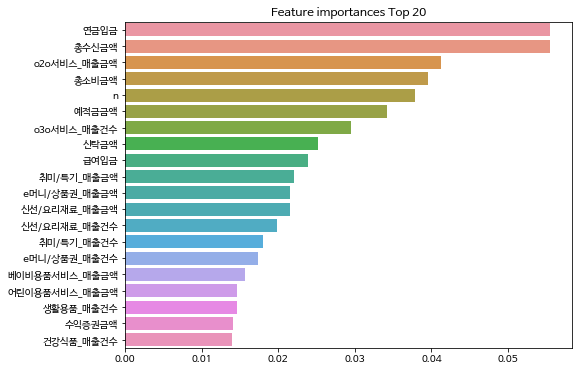

In [ ]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## 2번 전처리(1인당 데이터로 만들기)

한 품목의 매출건수, 매출액 등을 비교하려면 2번 전처리가 필요함.

In [ ]:
df.shape

(14472, 117)

In [ ]:
df.columns[102:109]
#104부터 금융데이터

Index(['향수_매출금액', '향수_매출건수', '급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액'], dtype='object')

In [ ]:
df.columns[0:6] #4부터 소비데이터

Index(['기준년월', '법정동', '성별', '연령', 'DIY자재/용품_매출금액', 'DIY자재/용품_매출건수'], dtype='object')

In [ ]:
df.columns[116] #n

'n'

In [ ]:
n = df.iloc[:,116]

print(n.mean())
print(n.median())
print(n.std())
print(max(n))

253.67198728579325
41.0
665.9228117467821
9361


In [ ]:
df[df['n'] == max(n)]

,기준년월,법정동,성별,연령,DIY자재/용품_매출금액,DIY자재/용품_매출건수,e머니/상품권_매출금액,e머니/상품권_매출건수,o2o서비스_매출금액,o3o서비스_매출건수,가공식품_매출금액,가공식품_매출건수,가방_매출금액,가방_매출건수,가전_매출금액,가전_매출건수,건강식품_매출금액,건강식품_매출건수,기부/후원_매출금액,기부/후원_매출건수,기타_매출금액,기타_매출건수,기타결제_매출금액,기타결제_매출건수,기타교육비_매출금액,기타교육비_매출건수,남성뷰티_매출금액,남성뷰티_매출건수,남성속옷실내복_매출금액,남성속옷실내복_매출건수,남성의류_매출금액,남성의류_매출건수,다이어트_매출금액,다이어트_매출건수,디지털_매출금액,디지털_매출건수,레저_매출금액,레저_매출건수,메이크업_매출금액,메이크업_매출건수,...,여성속옷실내복_매출건수,여성의류_매출금액,여성의류_매출건수,여행_매출금액,여행_매출건수,육아용품서비스_매출금액,육아용품서비스_매출건수,음료_매출금액,음료_매출건수,인테리어소품_매출금액,인테리어소품_매출건수,임산부용품서비스_매출금액,임산부용품서비스_매출건수,자동차_매출금액,자동차_매출건수,취미/특기_매출금액,취미/특기_매출건수,침구/수예_매출금액,침구/수예_매출건수,침대_매출금액,침대_매출건수,테이블가구_매출금액,테이블가구_매출건수,패션소품_매출금액,패션소품_매출건수,향수_매출금액,향수_매출건수,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n
13000,5,신림동,1,60,0,0,33,1063456.0,228,9413533,28,1267680,0,0,7,5564471,45,2343542,0,0.0,5,326029,64,439332,0,0,0,0,0,0,5,186568,False,False,51,3425695,0,0,0,0,...,0,0,0,40,3285377.0,16,887185,19,466438,0,0,7,410903,5,337600,51,4785598,10,982307.0,0,0,5,341446,0,0,0,0,0,0,627028743.0,7327476079,32759281973,1.200624e+10,398488167.0,0,0.0,0.0,0,0.0,9361


집계된 신림동 60대 이상 남성 수 : 9361명
대략적인 신림동 60대 이상 남성 수 : 20344명
-> alpha * 1.8

In [ ]:
#df.columns[0:4] -> 건드리지 말기
#df.columns[4:104] -> 소비데이터
#df.columns[104:116] -> 금융데이터
#df.columns[116] -> n

alpha = 1.8 #BC카드와 신한은행 인원수의 가중치
beta = 1e-7 #0으로 나누지 않기 위한 값

data = df

data['theta'] = ((data['n'] * alpha) + beta)

for i in data.columns[4:104]:
  data[i] = data[i] / data['theta']

for i in data.columns[104:116]:
  data[i] = data[i] / data['n']

data = data.drop(columns=['theta', 'n']) # 전체 인원수와 관련한 피쳐를 삭제
data.head()

,기준년월,법정동,성별,연령,DIY자재/용품_매출금액,DIY자재/용품_매출건수,e머니/상품권_매출금액,e머니/상품권_매출건수,o2o서비스_매출금액,o3o서비스_매출건수,가공식품_매출금액,가공식품_매출건수,가방_매출금액,가방_매출건수,가전_매출금액,가전_매출건수,건강식품_매출금액,건강식품_매출건수,기부/후원_매출금액,기부/후원_매출건수,기타_매출금액,기타_매출건수,기타결제_매출금액,기타결제_매출건수,기타교육비_매출금액,기타교육비_매출건수,남성뷰티_매출금액,남성뷰티_매출건수,남성속옷실내복_매출금액,남성속옷실내복_매출건수,남성의류_매출금액,남성의류_매출건수,다이어트_매출금액,다이어트_매출건수,디지털_매출금액,디지털_매출건수,레저_매출금액,레저_매출건수,메이크업_매출금액,메이크업_매출건수,...,여성속옷실내복_매출금액,여성속옷실내복_매출건수,여성의류_매출금액,여성의류_매출건수,여행_매출금액,여행_매출건수,육아용품서비스_매출금액,육아용품서비스_매출건수,음료_매출금액,음료_매출건수,인테리어소품_매출금액,인테리어소품_매출건수,임산부용품서비스_매출금액,임산부용품서비스_매출건수,자동차_매출금액,자동차_매출건수,취미/특기_매출금액,취미/특기_매출건수,침구/수예_매출금액,침구/수예_매출건수,침대_매출금액,침대_매출건수,테이블가구_매출금액,테이블가구_매출건수,패션소품_매출금액,패션소품_매출건수,향수_매출금액,향수_매출건수,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,1,가락동,1,20,0.000000,0.000000,0.167472,1130.531401,0.677939,23321.634457,0.040258,513.236715,0.0,0.0,0.000000,0.000000,0.067633,1388.175523,0.0,0.0,0.000000,0.000000,0.027375,429.655394,0.0,0.0,0.0,0.0,0.0,0.0,0.040258,2169.867955,0.0,0.0,0.107890,9338.117551,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.120773,4213.576489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167472,7660.185184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17546.130435,0.000000,0.000000,8.008194e+05,1.848215e+06,2.789248e+06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,1,가락동,1,30,0.028386,1460.558259,0.264936,4866.200324,2.254663,80556.773441,0.145985,12201.244929,0.0,0.0,0.135172,53737.688557,0.158151,5589.970261,0.0,0.0,0.033793,767.077588,0.056772,1372.141119,0.0,0.0,0.0,0.0,0.0,0.0,0.028386,1293.838875,0.0,0.0,0.241957,21885.497429,0.022979,581.394972,0.0,0.0,...,0.0,0.0,0.033793,1123.003514,0.258178,20041.613947,0.293323,8093.467152,0.112192,3550.074344,0.033793,2155.729927,0.022979,903.384698,0.039200,637.200595,0.168965,13136.999187,0.062179,4156.855906,0.017572,8416.612597,0.044607,5681.803189,0.056772,7405.920518,0.0,0.0,439735.328467,0.000000,0.000000,1.319376e+06,4.218648e+06,4.382826e+06,6.705350e+04,0.000000,1.004127e+06,5.345186e+06,0.000000e+00,0.0
2,1,가락동,1,40,0.031617,1049.963866,0.156579,6392.780788,1.305330,57931.895505,0.182174,6245.088828,0.0,0.0,0.100873,7688.264076,0.243902,49418.291170,0.0,0.0,0.037639,1275.769346,0.094851,762.433002,0.0,0.0,0.0,0.0,0.0,0.0,0.043662,2284.351099,0.0,0.0,0.237880,9520.021077,0.031617,1817.488708,0.0,0.0,...,0.0,0.0,0.049684,1428.839205,0.158085,14754.074072,0.130985,4133.724781,0.144535,4560.478771,0.037639,6884.235169,0.031617,868.259560,0.025595,475.462210,0.126468,18613.938570,0.094851,3781.945197,0.000000,0.000000,0.000000,0.000000,0.043662,1931.028304,0.0,0.0,332885.048780,0.000000,0.000000,1.353792e+06,4.582468e+06,2.060297e+06,1.074333e+06,111287.081301,1.588877e+06,3.195215e+06,3.981676e+06,0.0
3,1,가락동,1,50,0.026018,4244.608203,0.088766,4054.152127,0.338231,15838.269052,0.044383,3085.786654,0.0,0.0,0.038261,8445.932046,0.058157,4911.368227,0.0,0.0,0.000000,0.000000,0.676462,4235.485154,0.0,0.0,0.0,0.0,0.0,0.0,0.026018,1482.375268,0.0,0.0,0.082645,16862.565042,0.019896,1045.120906,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.044383,4953.798591,0.038261,549.996939,0.058157,1417.741047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140802,10544.781143,0.026018,1600.068870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,166313.619835,19176.355372,0.000000,1.505080e+06,4.359710e+06,1.440466e+06,2.224232e+06,94549.652893,7.198724e+05,5.718092e+06,1.996135e+06,0.0
4,1,가락동,1,60,0.000000,0.000000,0.000000,0.000000,0.027682,1257.504773,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.135548,110.233868,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043910,10012.325314,0.000000,0.000000,0.000000,0.000

In [ ]:
data['남성뷰티_매출건수'].mean()

6.434959217321049

###o2o서비스 매출건수 예측

#### 법정동 데이터 삭제

1. 소비 데이터에 대한 정보를 모두 삭제

In [ ]:
y = data.iloc[:,9]

test = data
for i in data.columns[4:104]:
  test = test.drop(columns=i)

test = test.drop(columns=['법정동'])

X = test.iloc[:,:]

In [ ]:
print(X)
print(y)

       기준년월  성별  연령  ...        담보대출금액        주택대출금액  전세자금대출금액
0         1   1  20  ...  0.000000e+00  0.000000e+00       0.0
1         1   1  30  ...  5.345186e+06  0.000000e+00       0.0
2         1   1  40  ...  3.195215e+06  3.981676e+06       0.0
3         1   1  50  ...  5.718092e+06  1.996135e+06       0.0
4         1   1  60  ...  2.347173e+06  1.078588e+06       0.0
...     ...  ..  ..  ...           ...           ...       ...
14467     5   1  50  ...  0.000000e+00  0.000000e+00       0.0
14468     5   2  20  ...  0.000000e+00  0.000000e+00       0.0
14469     5   2  30  ...  0.000000e+00  0.000000e+00       0.0
14470     5   2  40  ...  3.321510e+07  0.000000e+00       0.0
14471     5   2  50  ...  6.824469e+07  0.000000e+00       0.0

[14472 rows x 15 columns]
0        2.332163e+04
1        8.055677e+04
2        5.793190e+04
3        1.583827e+04
4        1.257505e+03
             ...     
14467    0.000000e+00
14468    7.926755e+05
14469    7.416762e+05
14470    1.106950e+

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

random_forest= RandomForestRegressor(n_estimators= 50, criterion='mse', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

50218279776.185425
100746.24811839918
0.24865828915857324


성능이 아주 구림

alpha가 1일때 R square : 0.33
alpha 1.8일 때 R square : 0.35

2. o2o서비스를 제외한 모든 feature살림

In [ ]:
y = data.iloc[:,9]

test = data
test = test.drop(columns=['o2o서비스_매출금액'])
test = test.drop(columns=['o3o서비스_매출건수'])
test = test.drop(columns=['법정동'])
X = test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

random_forest= RandomForestRegressor(n_estimators= 50, criterion='mse', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)

In [ ]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

33369093717.08234
68507.20833282024
0.5007476943782126


alpha 1일 때 R square : 0.6


alpha 1.8일 때 R ssquare : 0.53

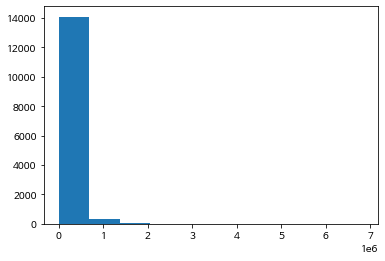

In [ ]:
o2o_count = data['o3o서비스_매출건수']
o2o_sale = data['o2o서비스_매출금액']

plt.hist(o2o_count)
plt.show()

1인당 o2o서비스 데이터 분석

In [ ]:
print(data['o3o서비스_매출건수'].mean())
print(data['o3o서비스_매출건수'].std())
print(data['o3o서비스_매출건수'].median())
print(data['o3o서비스_매출건수'].max())

156260.3420447351
247153.54772634475
80935.08075507064
6845250.087631942


1인당이 너무 높게 나옴. 높게 나온 값에 대한 조정치를 부여해야 할듯.

In [ ]:
alpha = 1.8 #BC카드와 신한은행 인원수의 가중치
beta = 1e-7 #0으로 나누지 않기 위한 값

data1 = df

data1['theta'] = ((data1['n'] * alpha) + beta)

for i in data1.columns[4:104]:
  data1[i] = data1[i] / data1['theta']

for i in data1.columns[104:116]:
  data1[i] = data1[i] / data1['n']

data1.sort_values(by='o3o서비스_매출건수', ascending=False).head(20).loc[:,['기준년월','법정동','성별','연령','o3o서비스_매출건수', 'n']]

,기준년월,법정동,성별,연령,o3o서비스_매출건수,n
7673,3,을지로2가,2,30,2.546231e+06,1
10149,4,신촌동,2,40,2.497821e+06,1
4065,2,신촌동,1,20,2.306640e+06,1
1399,1,신촌동,2,20,1.901458e+06,2
4531,2,을지로2가,2,30,1.723360e+06,1
1762,1,을지로2가,1,30,1.722272e+06,1
13897,5,중학동,1,40,1.677161e+06,1
7146,3,신촌동,1,30,1.656147e+06,1
13626,5,을지로4가,2,30,1.652497e+06,1
10570,4,을지로4가,1,30,1.565714e+06,1


은행 데이터가 1개밖에 없는 경우가 1인당 매출건수 비약적으로 올라갔음

은행데이터가 몇명 대상인지 분석(n)

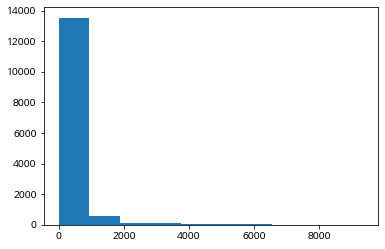

In [ ]:
plt.hist(data1['n'])
plt.show()

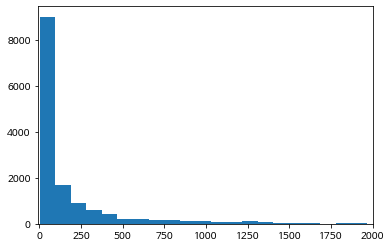

In [ ]:
plt.hist(data1['n'], bins=100)
plt.xlim(-10, 2000)
plt.show()

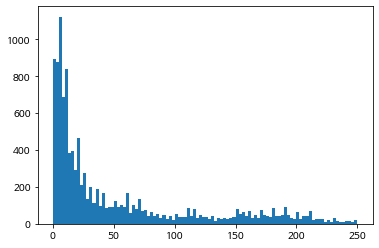

In [ ]:
plt.hist(data1['n'],bins=100, range=(0,250))
plt.show()